In [202]:
import pandas as pd

In [203]:
df = pd.read_csv('housing.csv')

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8894 entries, 0 to 8893
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   full_sq             8894 non-null   int64  
 1   life_sq             8894 non-null   float64
 2   floor               8894 non-null   float64
 3   max_floor           8894 non-null   float64
 4   material            8894 non-null   object 
 5   build_year          8859 non-null   float64
 6   num_room            8894 non-null   float64
 7   kitch_sq            8894 non-null   float64
 8   sub_area            8894 non-null   object 
 9   area_m              8894 non-null   float64
 10  green_zone_part     8894 non-null   float64
 11  indust_part         8894 non-null   float64
 12  preschool           8894 non-null   int64  
 13  school              8894 non-null   int64  
 14  healthcare          8894 non-null   int64  
 15  shopping            8894 non-null   int64  
 16  office

In [205]:
df.sub_area.nunique()

144

In [206]:
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [207]:
for column in df.columns:
    print(column, df[column].nunique())

full_sq 160
life_sq 114
floor 36
max_floor 43
material 5
build_year 105
num_room 11
kitch_sq 40
sub_area 144
area_m 144
green_zone_part 144
indust_part 130
preschool 13
school 14
healthcare 7
shopping 16
office 30
radiation 2
detention 2
young 144
work 143
elder 144
0_6_age 144
7_14_age 144
metro_min_avto 6474
metro_km_avto 6474
metro_min_walk 6469
metro_km_walk 6469
mkad_km 6476
kremlin_km 6476
green_part_1000 2949
prom_part_1000 2353
office_count_1000 75
trc_count_1000 18
leisure_count_1000 23
price_doc 1006


In [208]:
pd.set_option('display.max_columns', None)
df[df.metro_min_walk.isna()]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,sub_area,area_m,green_zone_part,indust_part,preschool,school,healthcare,shopping,office,radiation,detention,young,work,elder,0_6_age,7_14_age,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,mkad_km,kremlin_km,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,leisure_count_1000,price_doc
83,56,41.0,3.0,9.0,brick,1966.0,3.0,5.0,Begovoe,4.048457e+06,0.001879,0.327018,3,5,1,0,23,no,no,4842,25933,10729,2263,2270,1.029686,0.722920,NaN,NaN,12.279808,4.595453,2.30,23.38,23,1,0,7000000
892,33,18.0,4.0,9.0,panel,1970.0,1.0,7.0,Timirjazevskoe,1.050803e+07,0.331319,0.020741,4,8,2,5,5,yes,no,11205,52030,18652,4969,5613,1.862701,0.811057,NaN,NaN,10.490772,6.386919,7.64,29.60,13,2,0,5900000
1585,66,48.0,5.0,5.0,brick,1935.0,3.0,6.0,Vojkovskoe,5.333221e+06,0.074077,0.169091,6,8,2,5,10,no,yes,8240,38266,18425,3905,3856,1.295060,0.603699,NaN,NaN,4.984632,12.687546,4.80,8.70,6,6,0,3000000
2650,181,81.0,3.0,3.0,mass concrete plus brick,2012.0,4.0,31.0,Timirjazevskoe,1.050803e+07,0.331319,0.020741,4,8,2,5,5,yes,no,11205,52030,18652,4969,5613,1.862701,0.811057,NaN,NaN,10.490772,6.386919,7.64,29.60,13,2,0,12000000
3261,30,18.0,9.0,9.0,brick,1966.0,1.0,5.0,Begovoe,4.048457e+06,0.001879,0.327018,3,5,1,0,23,no,no,4842,25933,10729,2263,2270,1.142448,0.670217,NaN,NaN,12.320525,4.565334,2.30,24.94,24,1,0,7150000
3993,32,18.0,6.0,9.0,panel,1970.0,1.0,6.0,Timirjazevskoe,1.050803e+07,0.331319,0.020741,4,8,2,5,5,yes,no,11205,52030,18652,4969,5613,1.862701,0.811057,NaN,NaN,10.490772,6.386919,7.64,29.60,13,2,0,6150000
4006,39,16.0,6.0,22.0,panel,2009.0,1.0,8.0,Timirjazevskoe,1.050803e+07,0.331319,0.020741,4,8,2,5,5,yes,no,11205,52030,18652,4969,5613,1.862701,0.811057,NaN,NaN,10.490772,6.386919,7.64,29.60,13,2,0,5490000
4083,38,18.0,3.0,14.0,panel,2007.0,1.0,7.0,Timirjazevskoe,1.050803e+07,0.331319,0.020741,4,8,2,5,5,yes,no,11205,52030,18652,4969,5613,1.862701,0.811057,NaN,NaN,10.490772,6.386919,7.64,29.60,13,2,0,5500000
5494,53,30.0,2.0,14.0,brick,1969.0,2.0,8.0,Vojkovskoe,5.333221e+06,0.074077,0.169091,6,8,2,5,10,no,yes,8240,38266,18425,3905,3856,0.739461,0.557666,NaN,NaN,5.090403,12.476173,1.77,14.35,7,6,0,9550000
5569,38,18.0,11.0,14.0,breezeblock,1994.0,1.0,8.0,Timirjazevskoe,1.050803e+07,0.331319,0.020741,4,8,2,5,5,yes,no,11205,52030,18652,4969,5613,1.862701,0.811057,NaN,NaN,10.490772,6.386919,7.64,29.60,13,2,0,7600000


<Axes: >

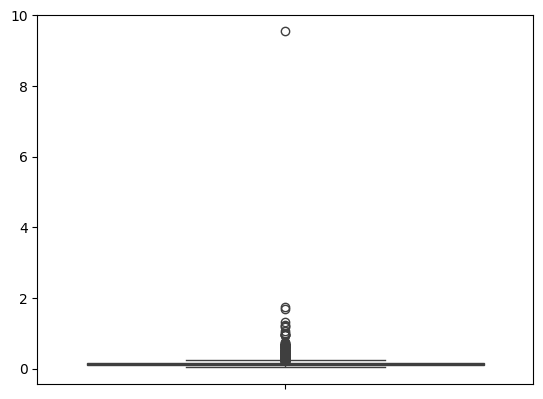

In [209]:
import seaborn as sns
sns.boxplot(df.metro_min_avto / df.metro_min_walk)

In [210]:
(df.metro_min_avto / df.metro_min_walk).describe()

count    8882.000000
mean        0.158278
std         0.125147
min         0.040462
25%         0.117813
50%         0.137246
75%         0.171083
max         9.551116
dtype: float64

In [211]:
df = df.dropna(how='any').reset_index(drop=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8848 entries, 0 to 8847
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               8848 non-null   int64  
 1   full_sq             8848 non-null   int64  
 2   life_sq             8848 non-null   float64
 3   floor               8848 non-null   float64
 4   max_floor           8848 non-null   float64
 5   material            8848 non-null   object 
 6   build_year          8848 non-null   float64
 7   num_room            8848 non-null   float64
 8   kitch_sq            8848 non-null   float64
 9   sub_area            8848 non-null   object 
 10  area_m              8848 non-null   float64
 11  green_zone_part     8848 non-null   float64
 12  indust_part         8848 non-null   float64
 13  preschool           8848 non-null   int64  
 14  school              8848 non-null   int64  
 15  healthcare          8848 non-null   int64  
 16  shoppi

In [212]:
for column in df.columns:
    if df[column].nunique() < 10:
        print(column, df[column].unique())

material ['panel' 'breezeblock' 'brick' 'mass concrete plus brick' 'mass concrete']
healthcare [1 2 0 3 4 6 5]
radiation ['no' 'yes']
detention ['no' 'yes']


In [213]:
df.select_dtypes('object')

,material,sub_area,radiation,detention
0,panel,Dmitrovskoe,no,no
1,panel,Savelovskoe,no,no
2,panel,Krjukovo,no,no
3,panel,Brateevo,yes,no
4,panel,Novogireevo,yes,no
...,...,...,...,...
8843,breezeblock,Pechatniki,yes,yes
8844,panel,Mar'ino,no,yes
8845,panel,Severnoe Butovo,no,no
8846,breezeblock,Ivanovskoe,yes,no


In [214]:
cat_cols = ['radiation', 'detention', 'sub_area', 'material']

In [215]:
one_hot_encoder = OneHotEncoder(sparse_output=False)

In [216]:
pd.DataFrame(one_hot_encoder.fit_transform(df[cat_cols]), columns=one_hot_encoder.get_feature_names_out())

,radiation_no,radiation_yes,detention_no,detention_yes,sub_area_Ajeroport,sub_area_Akademicheskoe,sub_area_Alekseevskoe,sub_area_Altuf'evskoe,sub_area_Arbat,sub_area_Babushkinskoe,sub_area_Basmannoe,sub_area_Begovoe,sub_area_Beskudnikovskoe,sub_area_Bibirevo,sub_area_Birjulevo Vostochnoe,sub_area_Birjulevo Zapadnoe,sub_area_Bogorodskoe,sub_area_Brateevo,sub_area_Butyrskoe,sub_area_Caricyno,sub_area_Cheremushki,sub_area_Chertanovo Central'noe,sub_area_Chertanovo Juzhnoe,sub_area_Chertanovo Severnoe,sub_area_Danilovskoe,sub_area_Dmitrovskoe,sub_area_Donskoe,sub_area_Dorogomilovo,sub_area_Filevskij Park,sub_area_Fili Davydkovo,sub_area_Gagarinskoe,sub_area_Gol'janovo,sub_area_Golovinskoe,sub_area_Hamovniki,sub_area_Horoshevo-Mnevniki,sub_area_Horoshevskoe,sub_area_Hovrino,sub_area_Ivanovskoe,sub_area_Izmajlovo,sub_area_Jakimanka,sub_area_Jaroslavskoe,sub_area_Jasenevo,sub_area_Juzhnoe Butovo,sub_area_Juzhnoe Medvedkovo,sub_area_Juzhnoe Tushino,sub_area_Juzhnoportovoe,sub_area_Kapotnja,sub_area_Kon'kovo,sub_area_Koptevo,sub_area_Kosino-Uhtomskoe,sub_area_Kotlovka,sub_area_Krasnosel'skoe,sub_area_Krjukovo,sub_area_Krylatskoe,sub_area_Kuncevo,sub_area_Kurkino,sub_area_Kuz'minki,sub_area_Lefortovo,sub_area_Levoberezhnoe,sub_area_Lianozovo,sub_area_Ljublino,sub_area_Lomonosovskoe,sub_area_Losinoostrovskoe,sub_area_Mar'ina Roshha,sub_area_Mar'ino,sub_area_Marfino,sub_area_Matushkino,sub_area_Meshhanskoe,sub_area_Metrogorodok,sub_area_Mitino,sub_area_Molzhaninovskoe,sub_area_Moskvorech'e-Saburovo,sub_area_Mozhajskoe,sub_area_Nagatino-Sadovniki,sub_area_Nagatinskij Zaton,sub_area_Nagornoe,sub_area_Nekrasovka,sub_area_Nizhegorodskoe,sub_area_Novo-Peredelkino,sub_area_Novogireevo,sub_area_Novokosino,sub_area_Obruchevskoe,sub_area_Ochakovo-Matveevskoe,sub_area_Orehovo-Borisovo Juzhnoe,sub_area_Orehovo-Borisovo Severnoe,sub_area_Ostankinskoe,sub_area_Otradnoe,sub_area_Pechatniki,sub_area_Perovo,sub_area_Pokrovskoe Streshnevo,sub_area_Poselenie Desjonovskoe,sub_area_Poselenie Filimonkovskoe,sub_area_Poselenie Kievskij,sub_area_Poselenie Kokoshkino,sub_area_Poselenie Krasnopahorskoe,sub_area_Poselenie Marushkinskoe,sub_area_Poselenie Mihajlovo-Jarcevskoe,sub_area_Poselenie Moskovskij,sub_area_Poselenie Mosrentgen,sub_area_Poselenie Pervomajskoe,sub_area_Poselenie Rjazanovskoe,sub_area_Poselenie Rogovskoe,sub_area_Poselenie Shhapovskoe,sub_area_Poselenie Shherbinka,sub_area_Poselenie Sosenskoe,sub_area_Poselenie Vnukovskoe,sub_area_Poselenie Voronovskoe,sub_area_Poselenie Voskresenskoe,sub_area_Preobrazhenskoe,sub_area_Presnenskoe,sub_area_Prospekt Vernadskogo,sub_area_Ramenki,sub_area_Rjazanskij,sub_area_Rostokino,sub_area_Savelki,sub_area_Savelovskoe,sub_area_Severnoe,sub_area_Severnoe Butovo,sub_area_Severnoe Izmajlovo,sub_area_Severnoe Medvedkovo,sub_area_Severnoe Tushino,sub_area_Shhukino,sub_area_Silino,sub_area_Sokol,sub_area_Sokol'niki,sub_area_Sokolinaja Gora,sub_area_Solncevo,sub_area_Staroe Krjukovo,sub_area_Strogino,sub_area_Sviblovo,sub_area_Taganskoe,sub_area_Tekstil'shhiki,sub_area_Teplyj Stan,sub_area_Timirjazevskoe,sub_area_Troickij okrug,sub_area_Troparevo-Nikulino,sub_area_Tverskoe,sub_area_Veshnjaki,sub_area_Vnukovo,sub_area_Vojkovskoe,sub_area_Vostochnoe,sub_area_Vostochnoe Degunino,sub_area_Vostochnoe Izmajlovo,sub_area_Vyhino-Zhulebino,sub_area_Zamoskvorech'e,sub_area_Zapadnoe Degunino,sub_area_Zjablikovo,sub_area_Zjuzino,material_breezeblock,material_brick,material_mass concrete,material_mass concrete plus brick,material_panel
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [217]:
df_oh = pd.concat([df.drop(cat_cols, axis=1), pd.DataFrame(one_hot_encoder.fit_transform(df[cat_cols]), columns=one_hot_encoder.get_feature_names_out())], axis=1)

In [218]:
X = df_oh.drop('price_doc', axis=1)
y = df_oh.price_doc

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [220]:
from sklearn.linear_model import LinearRegression

In [221]:
baseline = LinearRegression().fit(X_train, y_train)

In [222]:
from sklearn.metrics import r2_score
baseline.score(X_test, y_test)

0.5710017192500322

In [223]:
r2_score(y_test, baseline.predict(X_test))

0.5710017192500322

In [224]:
poly = PolynomialFeatures()

In [225]:
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [226]:
poly_model = LinearRegression().fit(X_poly_train, y_train)

In [227]:
poly_model.score(X_poly_test, y_test)

-6.986769447400047

In [228]:
baseline.score(X_test, y_test)

0.5710017192500322

In [229]:
X.shape

(8848, 185)

In [230]:
X_poly_train.shape

(5928, 17391)

In [231]:
from sklearn.feature_selection import SelectKBest, f_regression

In [241]:
f_statistic, p_value = f_regression(X_poly_train, y_train)
selector = SelectKBest(f_regression, k=125)
best_k_train_X = pd.DataFrame(selector.fit_transform(X_poly_train, y_train), columns=selector.get_feature_names_out())
best_k_test_X = pd.DataFrame(selector.transform(X_poly_test), columns=selector.get_feature_names_out())

In [242]:
best_features_model = LinearRegression().fit(best_k_train_X, y_train)

In [243]:
best_features_model.score(best_k_test_X, y_test)

0.5313167828221035